In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
from skimage import io
from skimage.transform import rotate

from torchvision import transforms

/home/mayank_khulbe_farmart_co/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from helper import generalPipeline, get_hog, HOG_Dataset
from model import DocumentAlignmentNet
from constants import label_mapping, pred_map, prediction_transform

In [6]:
import torch
model = DocumentAlignmentNet()
model.load_state_dict(torch.load('../cnn_model.pth'))
model

DocumentAlignmentNet(
  (conv_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.2, inplace=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout2d(p=0.2, inplace=False)
    (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout2d(p=0.2, inplace=False)
    (15): Conv2d(64, 128, kern

In [7]:
prediction = pd.read_csv('data/prediction_data.csv')
prediction.head()

,path,angles
0,data/rotated_images/prediction/mtwf0055_1_123.png,123
1,data/rotated_images/prediction/qnph0078_28_75.png,75
2,data/rotated_images/prediction/lpbn0226_1_139.png,139
3,data/rotated_images/prediction/rffn0226_1_253.png,253
4,data/rotated_images/prediction/nfgn0226_16_332...,332


In [8]:
def get_prediction(img_path, model, output_path): #full path with image name
    hough_pixels = generalPipeline(img_path)
    hog = get_hog(pixels=hough_pixels)
    transformed = prediction_transform(hog)

    pred = model.predict(transformed).item()
    prediction_angle = pred_map.get(pred, "invalid prediction")

    io.imsave(os.path.join(output_path), hough_pixels)

    return prediction_angle



In [9]:
def rotate_image(img_path, predicted_angle):
    img = Image.open(img_path)
    rotation_angle = 360-predicted_angle

    rotated_image = img.rotate(rotation_angle, expand=True)

    # Save the rotated image as a PNG file (replace 'output_path' with the desired output path)
    # output_path = "rotated_image.png"

    # Create a 1x2 subplot grid
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the original image on the first subplot
    axs[0].imshow(img)
    axs[0].set_title('Original Image')

    # Plot the rotated image on the second subplot
    axs[1].imshow(rotated_image)
    axs[1].set_title('Fixed Image')

    # Remove axis ticks and labels
    axs[0].axis('off')
    axs[1].axis('off')

    # Show the plot
    plt.show()

    rotated_image.save(img_path)
    # return rotated_image

========================Image 0========================

Input path: data/rotated_images/prediction/lpbn0226_3_41.png
Output_path: fixed_images/lpbn0226_3_41.png
Predicting the rotation angle for image 0...
Angle predicted: 90
Rotating and saving the image 0...


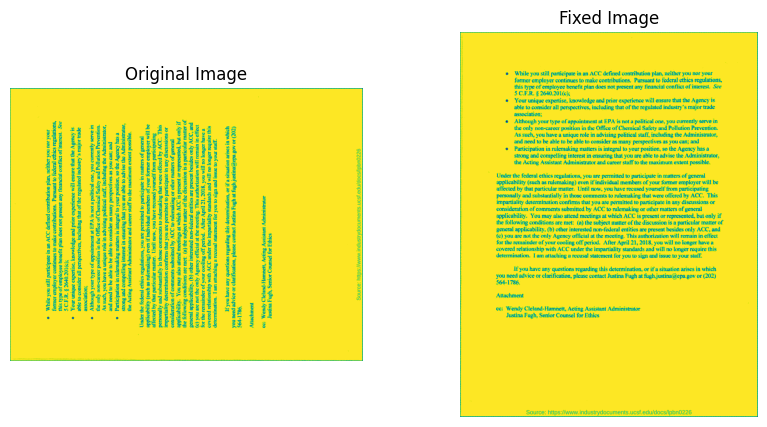

Image 0 saved to fixed_images/lpbn0226_3_41.png
========================Image 1========================

Input path: data/rotated_images/prediction/lhxn0226_173_318.png
Output_path: fixed_images/lhxn0226_173_318.png
Predicting the rotation angle for image 1...
Angle predicted: 0
Rotating and saving the image 1...


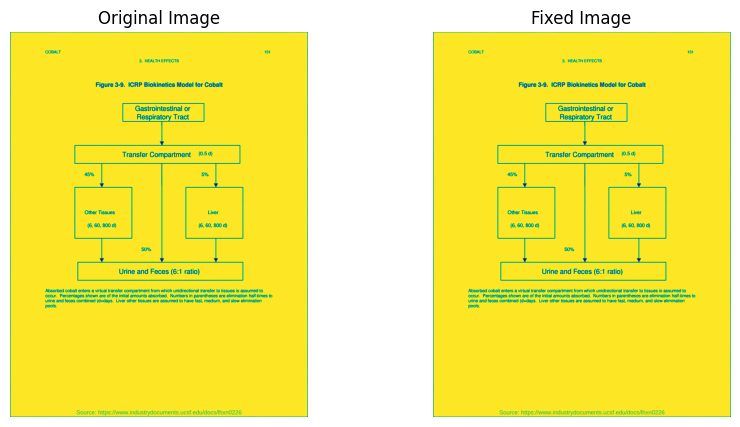

Image 1 saved to fixed_images/lhxn0226_173_318.png
========================Image 2========================

Input path: data/rotated_images/prediction/qnph0078_28_75.png
Output_path: fixed_images/qnph0078_28_75.png
Predicting the rotation angle for image 2...
Angle predicted: 90
Rotating and saving the image 2...


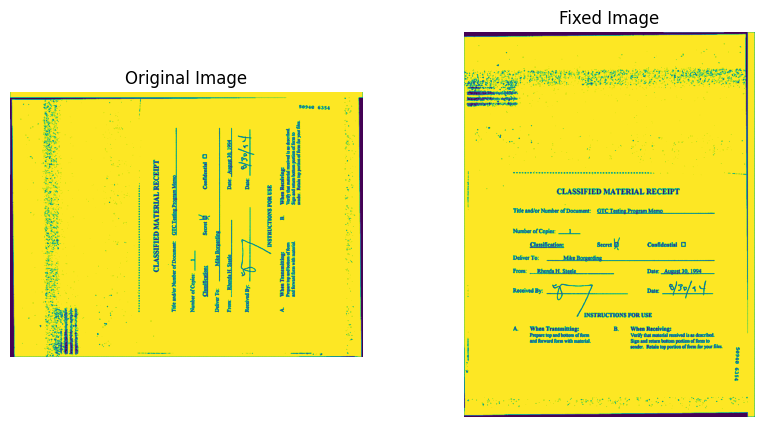

Image 2 saved to fixed_images/qnph0078_28_75.png
========================Image 3========================

Input path: data/rotated_images/prediction/mtwf0055_1_123.png
Output_path: fixed_images/mtwf0055_1_123.png
Predicting the rotation angle for image 3...
Angle predicted: 180
Rotating and saving the image 3...


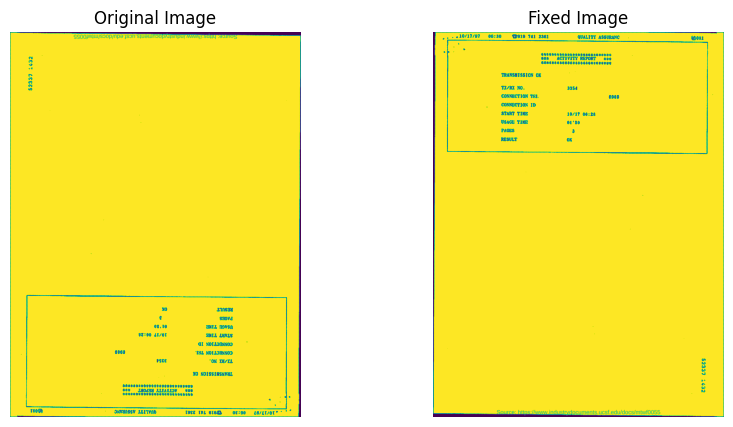

Image 3 saved to fixed_images/mtwf0055_1_123.png
========================Image 4========================

Input path: data/rotated_images/prediction/pzbg0024_1_191.png
Output_path: fixed_images/pzbg0024_1_191.png
Predicting the rotation angle for image 4...
Angle predicted: 270
Rotating and saving the image 4...


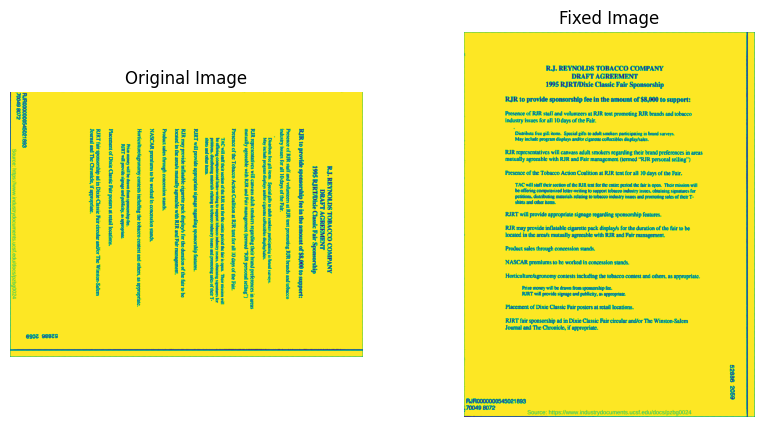

Image 4 saved to fixed_images/pzbg0024_1_191.png
========================Image 5========================

Input path: data/rotated_images/prediction/lnbl0226_8_151.png
Output_path: fixed_images/lnbl0226_8_151.png
Predicting the rotation angle for image 5...
Angle predicted: 180
Rotating and saving the image 5...


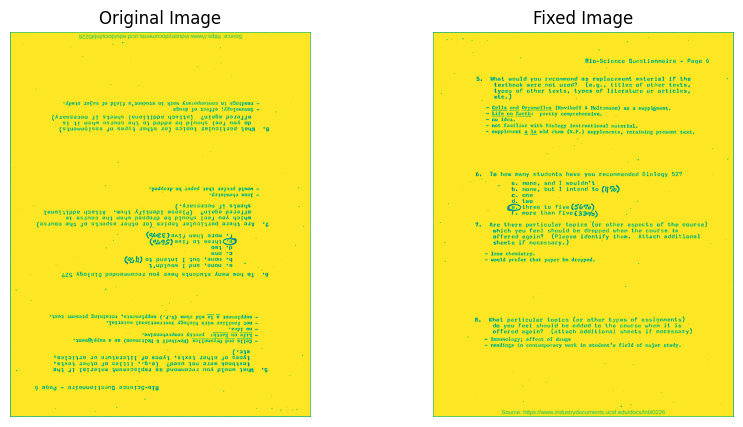

Image 5 saved to fixed_images/lnbl0226_8_151.png
========================Image 6========================

Input path: data/rotated_images/prediction/lpbn0226_1_139.png
Output_path: fixed_images/lpbn0226_1_139.png
Predicting the rotation angle for image 6...
Angle predicted: 180
Rotating and saving the image 6...


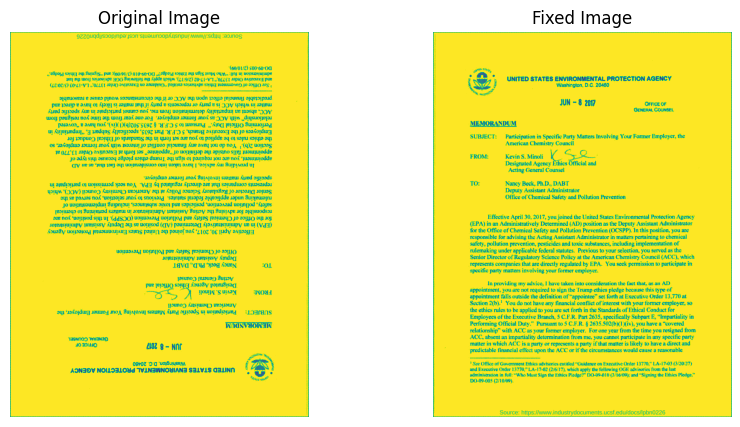

Image 6 saved to fixed_images/lpbn0226_1_139.png
========================Image 7========================

Input path: data/rotated_images/prediction/qnph0078_23_70.png
Output_path: fixed_images/qnph0078_23_70.png
Predicting the rotation angle for image 7...
Angle predicted: 90
Rotating and saving the image 7...


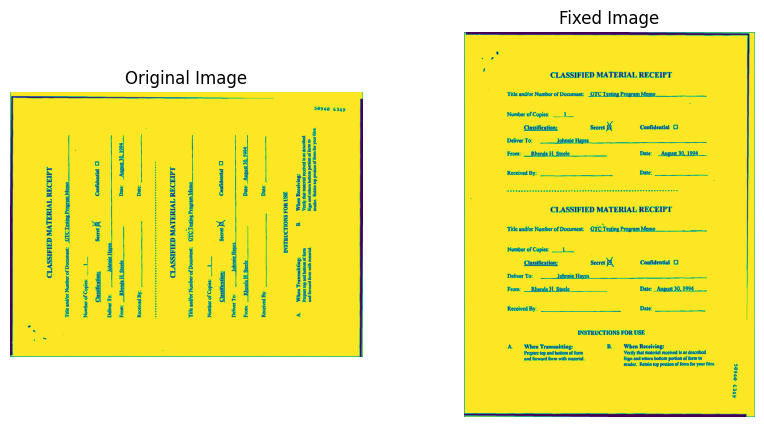

Image 7 saved to fixed_images/qnph0078_23_70.png
========================Image 8========================

Input path: data/rotated_images/prediction/nfgn0226_16_332.png
Output_path: fixed_images/nfgn0226_16_332.png
Predicting the rotation angle for image 8...
Angle predicted: 0
Rotating and saving the image 8...


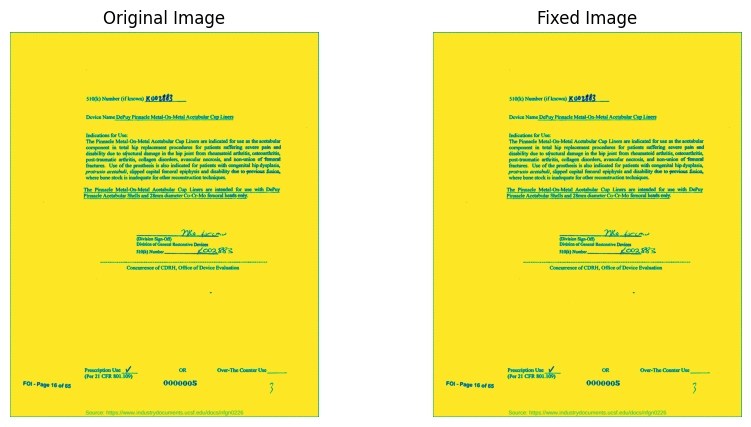

Image 8 saved to fixed_images/nfgn0226_16_332.png
========================Image 9========================

Input path: data/rotated_images/prediction/rffn0226_1_253.png
Output_path: fixed_images/rffn0226_1_253.png
Predicting the rotation angle for image 9...
Angle predicted: 270
Rotating and saving the image 9...


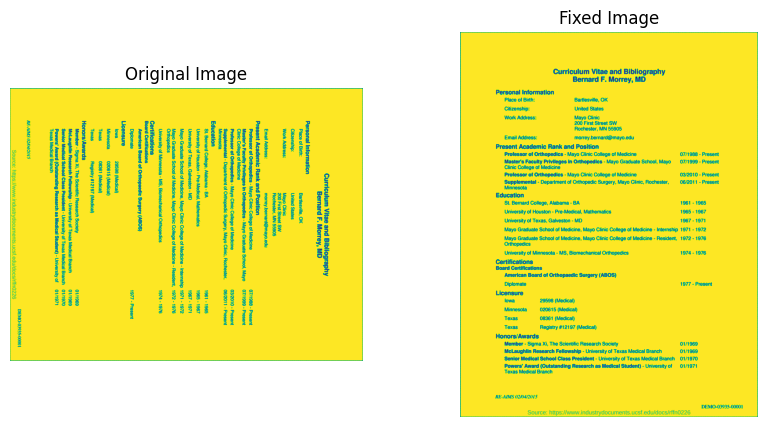

Image 9 saved to fixed_images/rffn0226_1_253.png


In [10]:
input_path = "data/rotated_images/prediction"
output_path = "fixed_images"
model = model
for idx, image in enumerate(os.listdir(input_path)):
    print(f"========================Image {idx}========================\n")
    new_input_path = os.path.join(input_path, image)
    new_output_path = os.path.join(output_path, image)
    print(F"Input path: {new_input_path}\nOutput_path: {new_output_path}")

    print(f"Predicting the rotation angle for image {idx}...")
    prediction_angle = get_prediction(new_input_path, model, new_output_path)

    print("Angle predicted: " + str(prediction_angle))
    print(f"Rotating and saving the image {idx}...")

    rotate_image(new_output_path, prediction_angle)

    print(f"Image {idx} saved to {new_output_path}")
